In [1]:
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [4]:
class multiclass(object): 
    def __init__(self):
        self.W1 = None
        self.b1 = 0
        self.W2 = None
        self.b2 = 0
        
    def load_data(self, file):
        with open(file,'r') as f:
            return np.array([i.strip().split(',') for i in f.readlines()], dtype=float)   
    
    def one_hot(self, y):
        temp = np.zeros((len(y), len(np.unique(y))))
        for i in range(len(y)):
            temp[i, int(y[i])] = 1.0
        return temp
    
    def create_mini_batch(self, data):
        np.random.shuffle(data)
        return np.split(data, 5)
        
    def hypothesis(self, X, w=None, b=None):
        f = np.dot(X,w) + b
        f = np.exp(f)
        denom = f.sum(axis=1)
        for i in range(len(denom)):
            f[i,:] /= denom[i]
        return f
    
    def forward(self, X):
        hidden = self.hypothesis(X, self.W1, self.b1)
        output = self.hypothesis(hidden, self.W2, self.b2)
        return hidden, output
    
    def loss(self, p, y, w=None, lamb=0.9):        
        return -1 * (np.sum(y*np.log(p))/len(y) + (lamb/2) * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2))))

    def gradient(self, X, hidden, Y, step_size=0.8):
        z, p = self.forward(X)
        
        dj_dw2 = np.dot(hidden.T, (p - Y))
        dj_db2 = sum(p - Y)

        dj_db1 = np.multiply(np.dot((self.W2).T,sum(p-Y)), 1-hidden*hidden)
        dj_dw1 = np.dot(X.T, dj_db1)
        
        result = np.array([[dj_dw2, dj_db2],
                           [dj_dw1, sum(dj_db1)]])
        return result
    
    def train(self, X, Y, step_size=0.04):
#         p = self.hypothesis(X)
#         J = self.loss(p, Y)
        z, p = self.forward(X)
        delta_a = self.gradient(X, z, Y)
        self.W2 -= step_size * delta_a[0][0]
        self.b2 -= step_size * delta_a[0][1]
        self.W1 -= step_size * delta_a[1][0]
        self.b1 -= step_size * delta_a[1][1]
        z, p = self.forward(X)
        correct, total = 0, 0
        for index in range(len(p)):
            if np.argmax(p[index]) == np.argmax(Y[index]):
                correct += 1
            total += 1

        J = self.loss(p, Y)
#         loss_per_epoch.append(J)
        return J, round(correct/total)

    def main(self, epochs=10):
        train_data = self.load_data('iris_train.dat')
        test_data = self.load_data('iris_test.dat')
         
        N,D = train_data[:,:-1].shape
        k = len(np.unique(train_data[:,-1]))
        self.W1 = np.random.normal(scale=1/D**0.5, size=(D,3))
        self.b1 = np.random.normal(scale=1/k**0.5, size=3)
        
        self.W2 = np.random.normal(scale=1/D**0.5, size=(3, k))
        self.b2 = np.random.normal(scale=1/k**0.5, size=k)
        print('W2:', self.W2)
        print('b2:', self.b2)
        print('W1:', self.W1)
        print('b1:', self.b1)
        train_loss = []
        train_accuracy = []
        test_loss = []
        test_accuracy = []
        test_x, test_y = test_data[:,:-1], self.one_hot(test_data[:, -1])
        for count in range(epochs):
            average_loss = 0
            average_accuracy = 0
            batches = self.create_mini_batch(train_data)
            for batch in batches:
                train_x, train_y = batch[:,:-1], self.one_hot(batch[:,-1])
               
                batch_loss, batch_accuracy = self.train(train_x, train_y)
                average_loss += batch_loss
                average_accuracy += batch_accuracy
            train_loss.append(round(average_loss/len(batches), 2))
            train_accuracy.append(round(average_accuracy/len(batches), 2))
            z, p = self.forward(test_x)
            test_loss.append(self.loss(p, test_y))
            correct = 0
            total = 0
            for index in range(len(p)):
                if np.argmax(p[index]) == np.argmax(test_y[index]):
                    correct += 1
                total += 1
            test_accuracy.append(round(correct/total, 2))

        %matplotlib notebook
        plt.plot(train_loss, label='Train loss')
        plt.plot(train_accuracy, label='Training accuracy')
        plt.plot(test_loss, label='Test loss')
        plt.plot(test_accuracy, label='Testing accuracy')
        plt.legend(loc='upper right')
        plt.show()
        
        print('Final Test loss:', test_loss[-1])
        print('Final Test accuracy:', test_accuracy[-1])


W2: [[ 0.53491504  0.63675797 -0.34167411]
 [ 0.83024526 -0.17023787  0.26748891]
 [ 0.18348518 -0.38174903  0.26539071]]
b2: [-0.93238716 -0.13312485  0.59182913]
W1: [[ 0.14304473 -0.05679801  0.08570911]
 [-0.24470836  0.95916905  0.506609  ]
 [ 0.31981422 -0.29914507  0.00149776]
 [ 0.33267609  0.56442796 -0.3303862 ]]
b1: [-0.65011026  0.91816463  0.53353993]


/Users/hitesh/Documents/machine learning/pytorchProjects/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
/Users/hitesh/Documents/machine learning/pytorchProjects/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


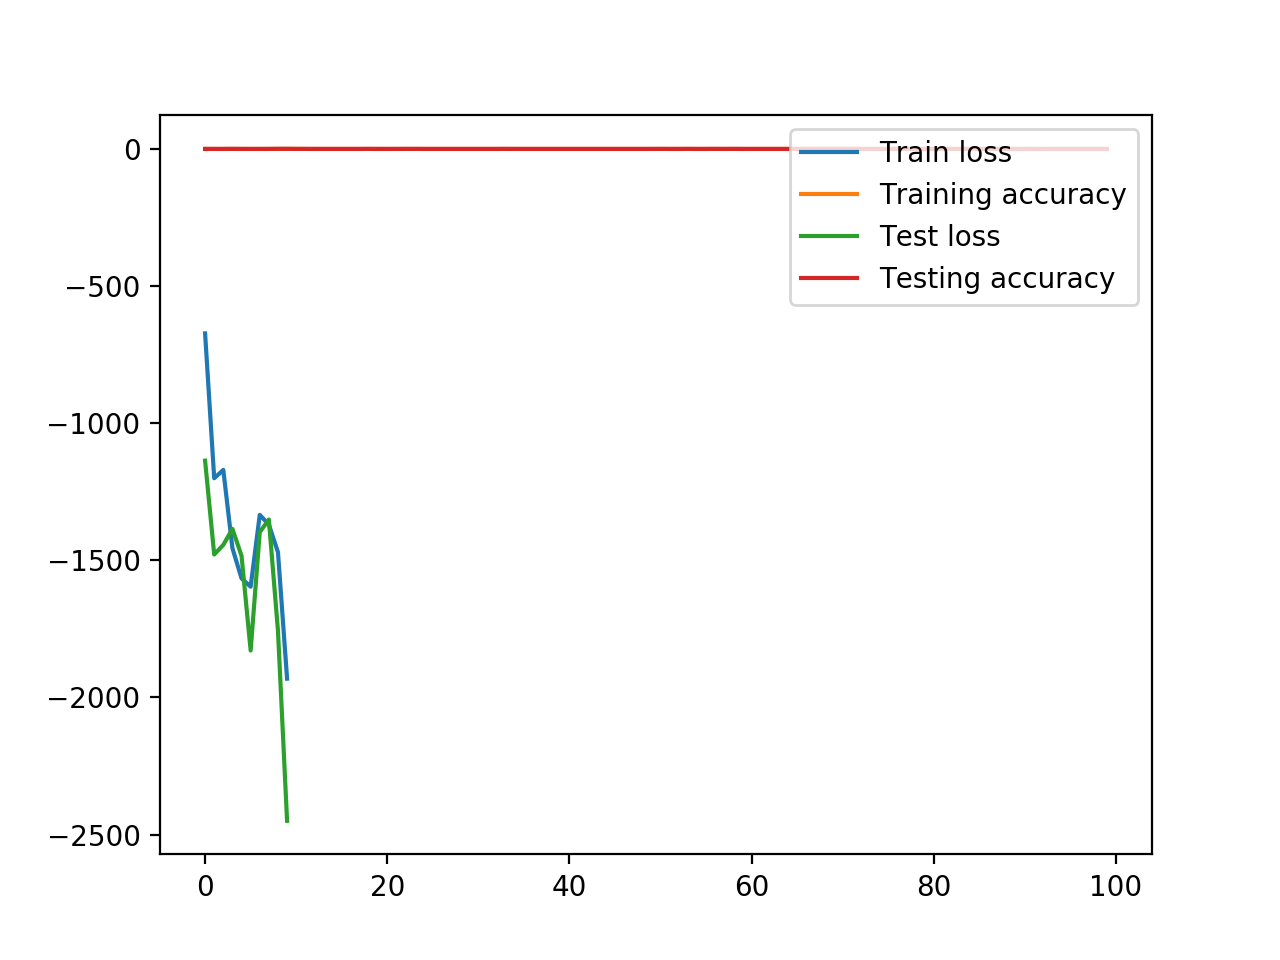

Final Test loss: nan
Final Test accuracy: 0.3


In [5]:
obj = multiclass()
obj.main(epochs=100)